In [12]:
import numpy as np
import matplotlib.pyplot as plt

import specrepro as sr

# Demonstrating exponential convergence of analytic/periodic function.

In [13]:
L = np.pi
f = lambda x: np.sin(x**2) # is analytic and periodic on the interval [-L, L]

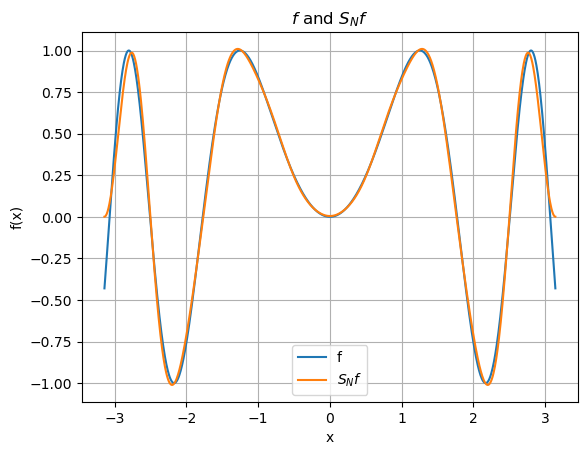

In [3]:
# Compute the periodic Gaussian function on the interval [-L, L]
x_values = np.linspace(-L, L, 1000)
y_values = f(x_values)
f_approx, _ = sr.fourier_partial_sum_projection(f, L, 20)
y2 = f_approx(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f')
plt.plot(x_values, y2, label='$S_N f$')
plt.title('$f$ and $S_N f$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
# Set the range of n_terms to evaluate
Ns = [2*i for i in range(1,100)]
Linf_errs = []

# Compute L2 error for each n_terms
for N in Ns:
    f_approx, _ = sr.fourier_partial_sum_projection(f, L, N, limit=250)
    Linf_err = sr.Linf_error_grid(f, f_approx, L)
    Linf_errs.append(Linf_err)

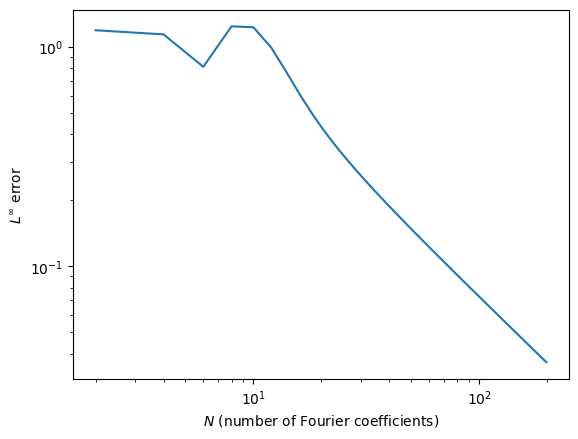

In [5]:
plt.loglog(Ns, Linf_errs)
plt.xlabel("$N$ (number of Fourier coefficients)")
plt.ylabel("$L^{\\infty}$ error")
plt.show()

# Demonstration of deterioration for analytic but non-periodic function.

In [10]:
L = np.pi
f = lambda x: x # is analytic and periodic on the interval [-L, L]

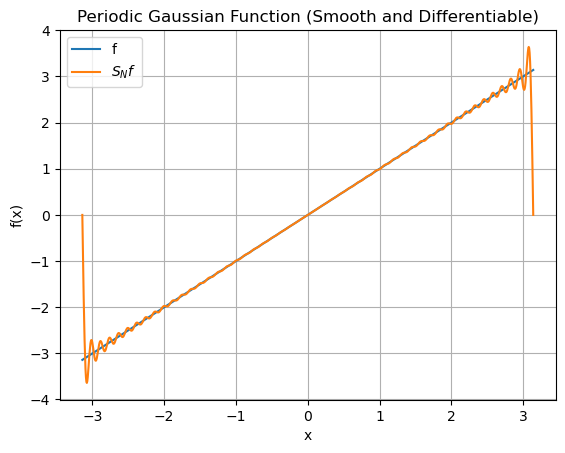

In [11]:
# Compute the periodic Gaussian function on the interval [-L, L]
x_values = np.linspace(-L, L, 1000)
y_values = f(x_values)
f_approx, _ = sr.fourier_partial_sum_projection(f, L, 100)
y2 = f_approx(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f')
plt.plot(x_values, y2, label='$S_N f$')
plt.title('Periodic Gaussian Function (Smooth and Differentiable)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Set the range of n_terms to evaluate
Ns = [2*i for i in range(1,100)]
Linf_errs = []

# Compute L2 error for each n_terms
for N in Ns:
    f_approx, _ = sr.fourier_partial_sum_projection(f, L, N, limit=250)
    Linf_err = sr.Linf_error_grid(f, f_approx, L, num_points=100000)
    Linf_errs.append(Linf_err)

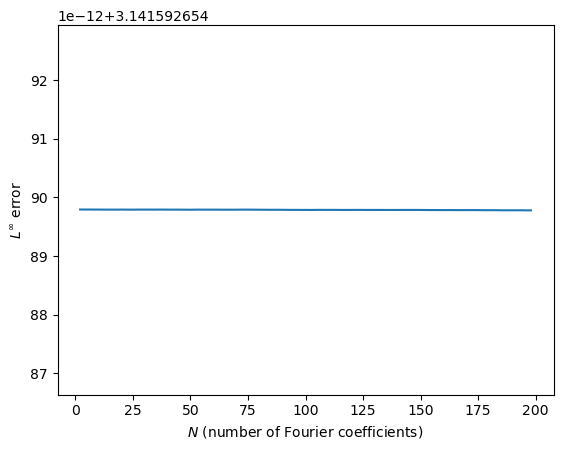

In [9]:
plt.plot(Ns, Linf_errs)
plt.xlabel("$N$ (number of Fourier coefficients)")
plt.ylabel("$L^{\\infty}$ error")
plt.show()